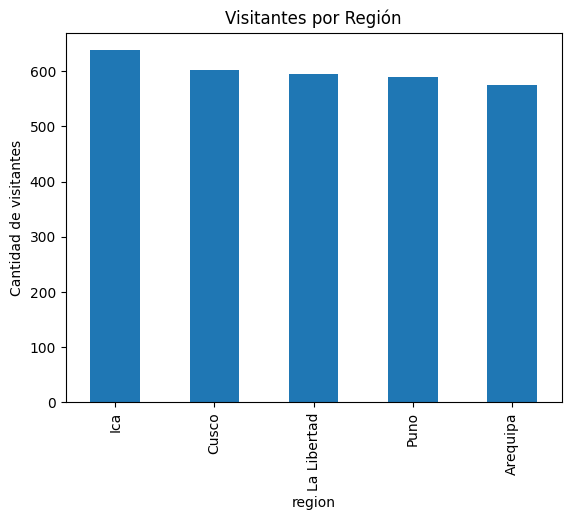

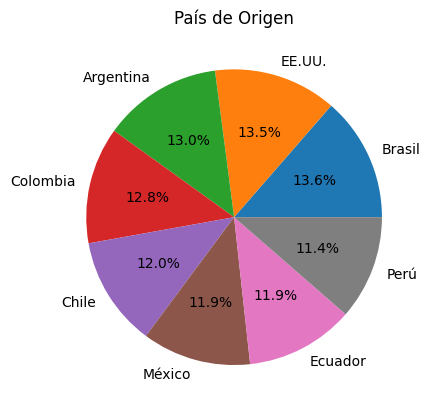

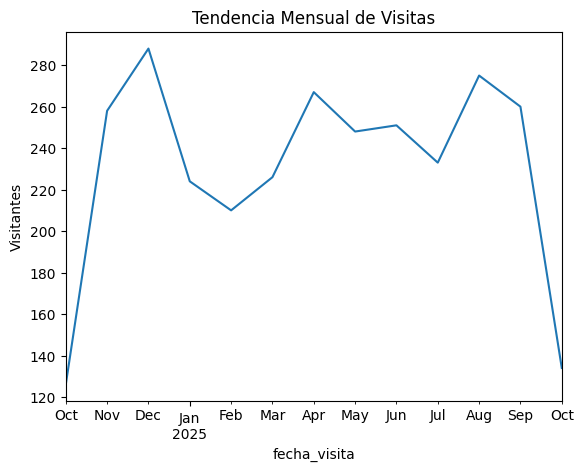

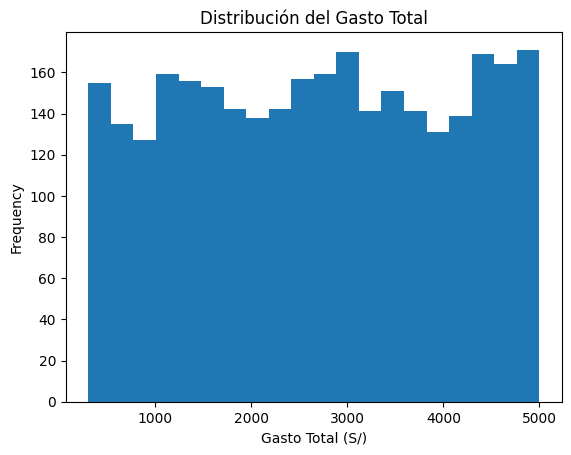

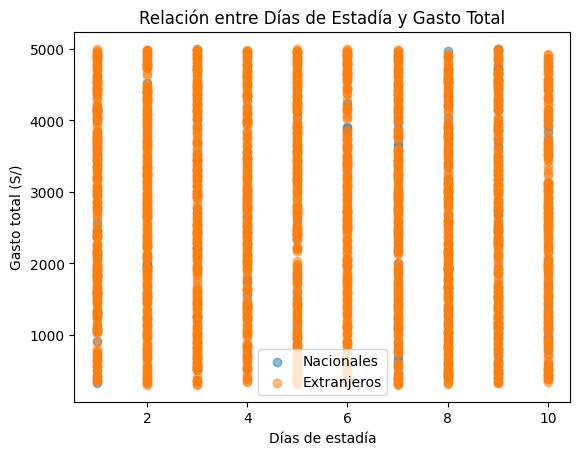

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def main():
    root = Path.cwd().parent
    data_path = root / "data"
    df = pd.read_csv(data_path / "visitantes_clean.csv")

    # 1️⃣ Barras - visitantes por región
    df["region"].value_counts().plot(kind="bar", title="Visitantes por Región")
    plt.ylabel("Cantidad de visitantes")
    plt.show()

    # 2️⃣ Circular - distribución por país
    df["pais_origen"].value_counts().plot(kind="pie", autopct="%1.1f%%", title="País de Origen")
    plt.ylabel("")
    plt.show()

    # 3️⃣ Línea - tendencia mensual
    df["fecha_visita"] = pd.to_datetime(df["fecha_visita"])
    df.groupby(df["fecha_visita"].dt.to_period("M")).size().plot(kind="line", title="Tendencia Mensual de Visitas")
    plt.ylabel("Visitantes")
    plt.show()

    # 4️⃣ Histograma - gasto promedio
    df["gasto_total"].plot(kind="hist", bins=20, title="Distribución del Gasto Total")
    plt.xlabel("Gasto Total (S/)")
    plt.show()

    # 💡 Extra - relación días vs gasto (scatter)
    nacionales = df[df["pais_origen"] == "Perú"]
    extranjeros = df[df["pais_origen"] != "Perú"]

    plt.scatter(nacionales["dias_estadia"], nacionales["gasto_total"], alpha=0.5, label="Nacionales")
    plt.scatter(extranjeros["dias_estadia"], extranjeros["gasto_total"], alpha=0.5, label="Extranjeros")
    plt.title("Relación entre Días de Estadía y Gasto Total")
    plt.xlabel("Días de estadía")
    plt.ylabel("Gasto total (S/)")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
